## Visualizing Activation Functions - Lab

## Introduction

Now that you've built your own CNN and seen how to visualize feature maps, its time to practice loading a pretrained model from file and practice visualizing the learned features systematically. In this lab, you'll expand upon the code from the previous lesson in order to succinctly visualize all the channels from each layer in a CNN.

## Objectives

You will be able to:

* Load a saved model
* Visualize the filters produced by hidden layers in a CNN

## Load a Model  

For this lab, load the saved a model **chest_xray_all_with_augmentation_data.h5**.  
This saved file includes both the model architecture and the trained weights. See the `model.save()` method for further details. The model was built in order to help identify patients with pneumonia. Start simply by loading the model and pulling up a summary of the layers. (To load the model use the `keras.models.load_model` method.) 

In [1]:
from keras.models import load_model

model = load_model('chest_xray_all_with_augmentation_data.h5')

Using TensorFlow backend.
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\lraic\Anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\lraic\Anaconda3\envs\learn

In [2]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [3]:
model.layers

## Load an Image

Before you plot the learned representations of the convolutional base, let's import an image and display it prior to processing. This will provide a comparison to the transformations formed by the model's feature maps.   

Load and display the image **person3_virus_16.jpeg**.

In [4]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image

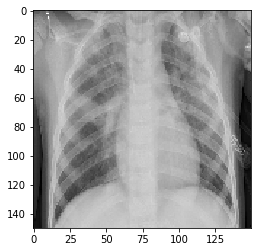

In [5]:
img_path = 'person3_virus_16.jpeg'


img = image.load_img(img_path, target_size=(150, 150))

plt.imshow(img)
plt.show()

## Transform the Image to a Tensor and Visualize Again

Recall that you should always preprocess our images into tensors when using deep learning. As such, preprocess this image and then redisplay the tensor.

(1, 150, 150, 3)


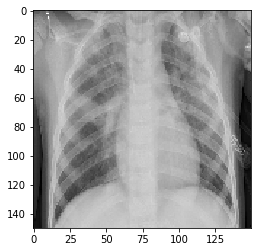

In [6]:
img_path = 'person3_virus_16.jpeg'


img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

## Plot Feature Maps

Now that you've loaded a model, practice visualizing each of the channels for each of feature maps of the convolutional layers. Recall that this process will take a few steps. First, extract the feature maps, or layer outputs from each of the activation functions in the model. From there, generate models that transform the image from its raw state to these feature maps. From there, you can then take these transformations and visualize each channel for each feature map.  

To preview the results of the solution code, take a sneek peak at the Intermediate_Activations_Visualized.pdf file.

In [7]:
from keras import models

In [8]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

(1, 148, 148, 32)


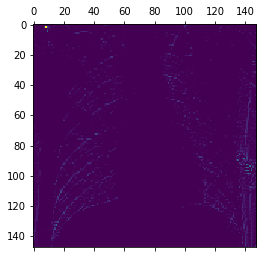

In [9]:
#Repeating the process for another channel (the 30th)
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 0], cmap='viridis')
plt.show()


conv2d_1/Relu:0


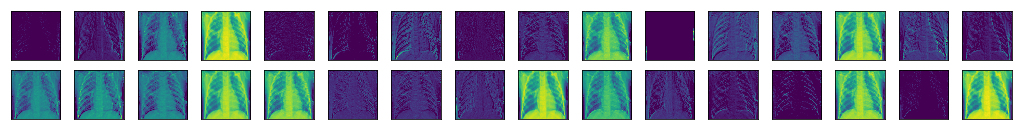


max_pooling2d_1/MaxPool:0


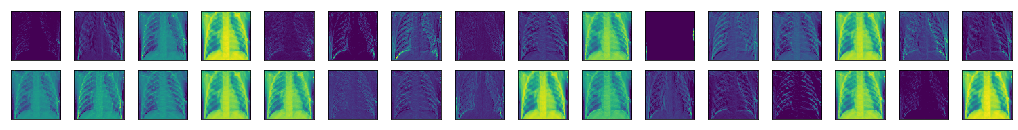


conv2d_2/Relu:0


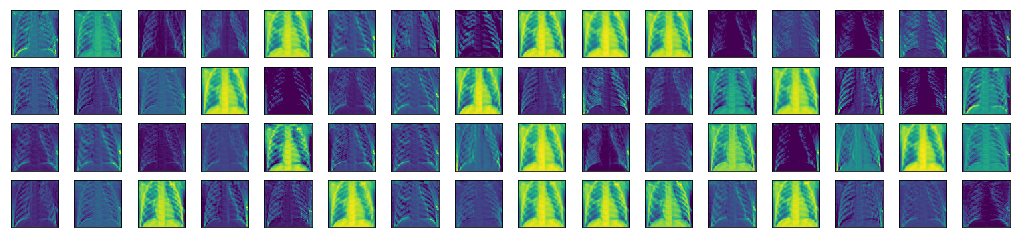


max_pooling2d_2/MaxPool:0


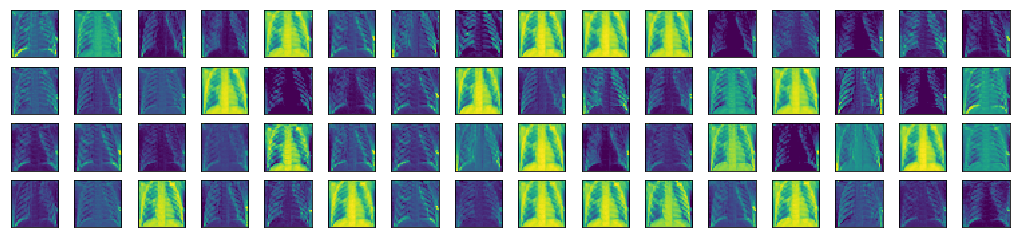


conv2d_3/Relu:0


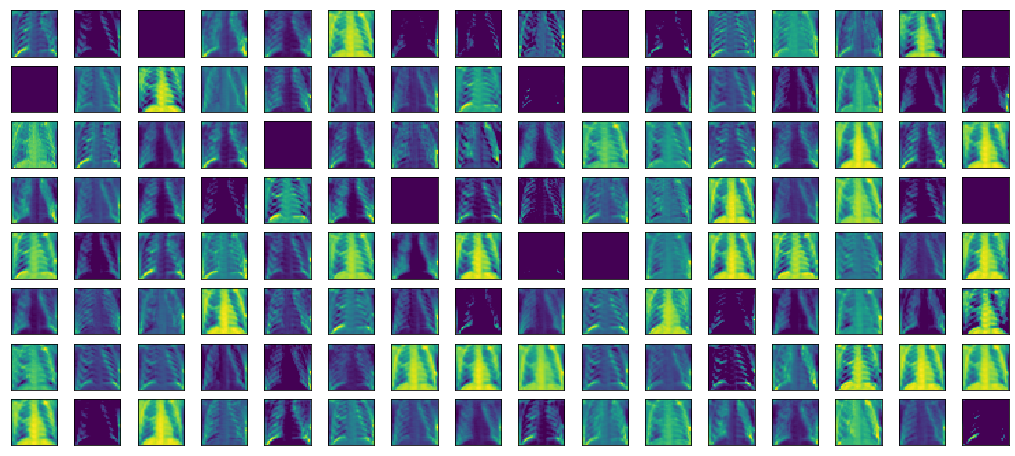


max_pooling2d_3/MaxPool:0


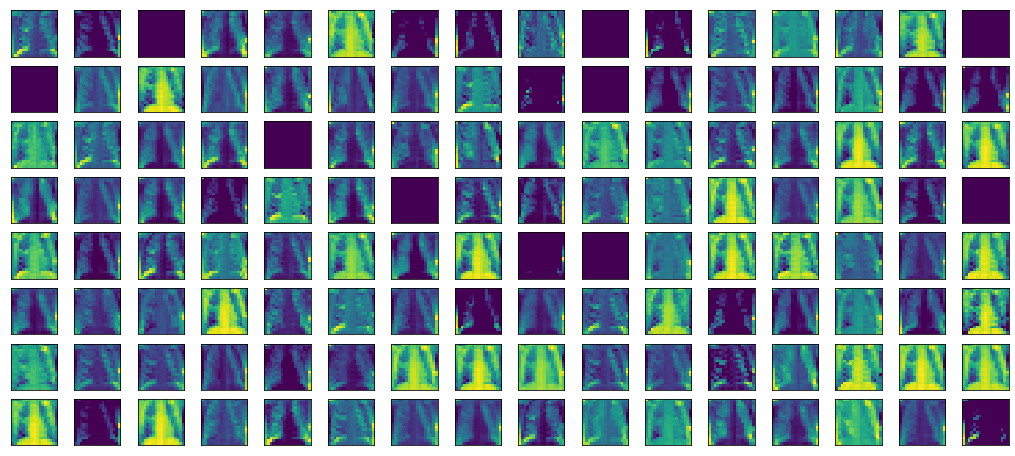


conv2d_4/Relu:0


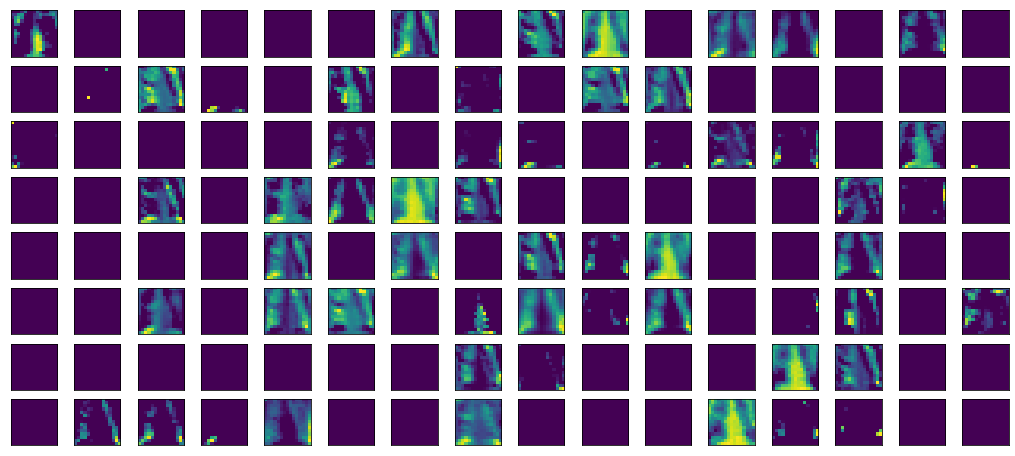


max_pooling2d_4/MaxPool:0


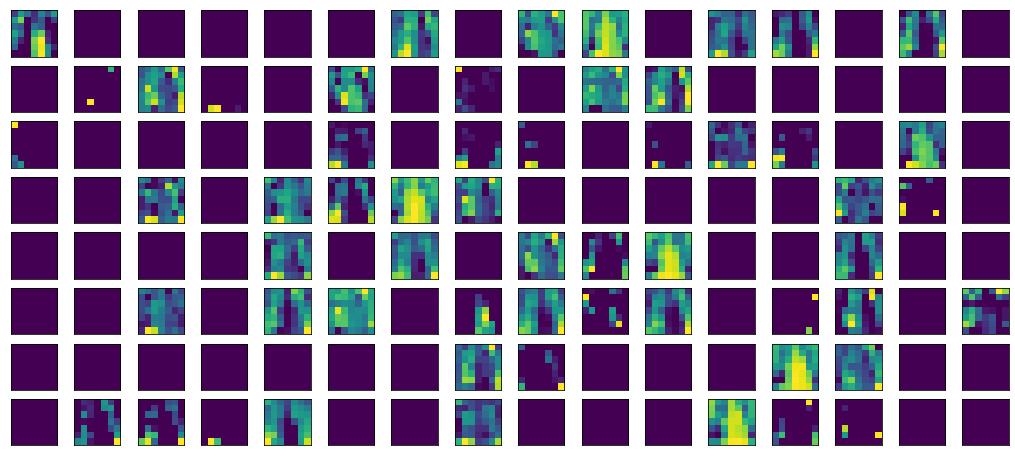

In [45]:
for layer_n, layer_activation in enumerate(activations):
    n_channels = layer_activation.shape[-1]
    print(f'\n{layer_outputs[layer_n].name}')
    fig, axes = plt.subplots(n_channels//16, 16, figsize=(18,(n_channels//16)*1))

    for i in range(n_channels):
        
        row = i//16
        column = i%16
        ax = axes[row, column]
        layer_activation = activations[layer_n]
        ax.matshow(layer_activation[0, :, :, i], cmap='viridis')
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
    plt.show()

## Summary

Nice work! In this lab, you practiced loading a model and then visualizing the activation feature maps learned by that model on your data! In the upcoming labs and sections you will build upon the first part of this and see how you can adapt the representations learned by more experienced models to your own applications which may have limited training data.